### Libraries and imports

In [1]:
! pip install gitpython sentence-transformers faiss-cpu tiktoken

### Indexing example

In [2]:
github_url = "https://github.com/viarotel-org/escrcpy"


In [3]:
from index_creation import build_index_from_github

index, embeddings, metadata, docs, num_chunks = build_index_from_github(github_url)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Average file length estimation (in chunks)

Let's display the number of chunks distribution over the files:

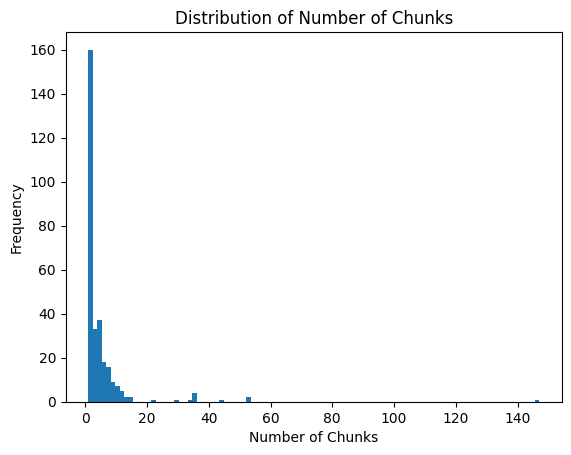

In [4]:
import matplotlib.pyplot as plt

plt.hist(num_chunks, bins=100)
plt.xlabel('Number of Chunks')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Chunks')
plt.show()

In [5]:
import numpy as np
import math

np.mean(num_chunks)

np.float64(4.9366666666666665)

In [6]:
MEAN_CHUNK_NUMBER = int(math.ceil(np.mean(num_chunks)))

### Search example

In [7]:
from sentence_transformers import CrossEncoder

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-12-v2')

In [8]:
from transformers import pipeline

generator = pipeline('text2text-generation', model='google/flan-t5-base')

Device set to use cpu


In [9]:
from index_search import search_index
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
question = "How does the SelectDisplay component handle the device options when retrieving display IDs?"

retrieved, summary = search_index(question, model, index, metadata, docs, cross_encoder, top_k=5, mean_chunk_number=MEAN_CHUNK_NUMBER, sum_generation=True, generator=generator)



Token indices sequence length is longer than the specified maximum sequence length for this model (1854 > 512). Running this sequence through the model will result in indexing errors


In [10]:
print([data_['file_path'] for data_ in retrieved])

['git_rep/docs/en/reference/scrcpy/video.md', 'git_rep/src/components/PreferenceForm/components/SelectDisplay/index.vue', 'git_rep/src/pages/preference/index.vue', 'git_rep/src/store/preference/model/device/index.js', 'git_rep/src/pages/preference/components/ScopeSelect/index.vue']


In [11]:
print(summary)

/script> /style> /template> /template> el-option v-for="item in options" :key="item.id" :label="item.label" :value="item.value" , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,


### Quality evaluation

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

The result for simple top-10 index selection:

In [13]:
from tqdm import tqdm

from index_model_evaluation import recall_from_json, simple_index, reranker_index


recall_from_json('/content/escrcpy-commits-generated.json', simple_index, model, index, docs, metadata)

 15%|█▍        | 5/34 [00:00<00:00, 41.34it/s]

Question: How does the SelectDisplay component handle the device options when retrieving display IDs?
Recall@10: 1.00
Answer: ['src/components/PreferenceForm/components/SelectDisplay/index.vue']
Prediction: ['git_rep/src/components/PreferenceForm/components/SelectDisplay/index.vue::chunk_1', 'git_rep/src/components/PreferenceForm/components/SelectDisplay/index.vue::chunk_0', 'git_rep/src/components/PreferenceForm/components/SelectAudioCodec/index.vue::chunk_0', 'git_rep/src/components/PreferenceForm/components/SelectVideoCodec/index.vue::chunk_0', 'git_rep/src/pages/preference/components/ScopeSelect/index.vue::chunk_1', 'git_rep/docs/en/reference/scrcpy/video.md::chunk_8', 'git_rep/src/components/PreferenceForm/components/SelectVideoCodec/index.vue::chunk_1', 'git_rep/src/locales/languages/en-US.json::chunk_23', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1::chunk_15', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1::chunk_15']

Question: How does the repository

 44%|████▍     | 15/34 [00:00<00:00, 41.49it/s]

Question: How is the sponsor dialog implemented to display sponsorship images dynamically?
Recall@10: 1.00
Answer: ['src/pages/about/components/SponsorDialog/index.vue']
Prediction: ['git_rep/src/pages/about/components/SponsorDialog/index.vue::chunk_0', 'git_rep/README.md::chunk_5', 'git_rep/src/pages/about/index.vue::chunk_2', 'git_rep/docs/en/donate.md::chunk_0', 'git_rep/src/pages/about/components/SponsorDialog/index.vue::chunk_1', 'git_rep/README-RU.md::chunk_7', 'git_rep/src/pages/device/components/DevicePopover/index.vue::chunk_0', 'git_rep/docs/zhHans/donate.md::chunk_0', 'git_rep/src/pages/device/components/DevicePopover/index.vue::chunk_1', 'git_rep/README-CN.md::chunk_6']

Question: What workflows support manual triggering in the repository?
Recall@10: 0.00
Answer: ['.github/workflows/release-assets.yml', '.github/workflows/sync-gitee.yml', '.github/workflows/sync-homebrew.yml']
Prediction: ['git_rep/dev-publish.yml::chunk_0', 'git_rep/CHANGELOG.md::chunk_65', 'git_rep/CHANGE

 74%|███████▎  | 25/34 [00:00<00:00, 41.77it/s]

Question: How does the plugin integrate custom components with Element Plus features?
Recall@10: 1.00
Answer: ['src/plugins/element-plus/index.js']
Prediction: ['git_rep/src/plugins/auto.js::chunk_0', 'git_rep/src/plugins/element-plus/auto.js::chunk_0', 'git_rep/vite.config.js::chunk_1', 'git_rep/src/plugins/element-plus/expands/EleFormItemCol/index.vue::chunk_0', 'git_rep/src/composables/useMessageLoading/index.js::chunk_0', 'git_rep/src/plugins/element-plus/index.js::chunk_0', 'git_rep/src/plugins/element-plus/expands/EleTooltipButton/index.vue::chunk_0', 'git_rep/src/components/QuickBar/index.vue::chunk_0', 'git_rep/vite.config.js::chunk_0', 'git_rep/src/App.vue::chunk_0']

Question: What configuration is used for optimizing SVG icons in the repository?
Recall@10: 0.00
Answer: ['src/icons/svgo.config.js']
Prediction: ['git_rep/src/icons/svg/wifi.svg::chunk_0', 'git_rep/src/icons/svg/multi-screen.svg::chunk_0', 'git_rep/package.json::chunk_1', 'git_rep/src/icons/components/SvgIcon.vu

100%|██████████| 34/34 [00:00<00:00, 38.26it/s]

Question: How does the application determine and validate the paths for external binaries (like scrcpy, adb, and gnirehtet) at startup, and which module or file manages this logic?
Recall@10: 0.00
Answer: ['electron/configs/scrcpy/index.js', 'electron/configs/android-platform-tools/index.js', 'electron/configs/gnirehtet/index.js']
Prediction: ['git_rep/docs/en/reference/scrcpy/develop.md::chunk_7', 'git_rep/docs/en/reference/gnirehtet/index.md::chunk_10', 'git_rep/docs/en/reference/scrcpy/develop.md::chunk_4', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1::chunk_33', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1::chunk_33', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1::chunk_33', 'git_rep/docs/en/reference/scrcpy/build.md::chunk_7', 'git_rep/docs/en/reference/scrcpy/develop.md::chunk_6', 'git_rep/docs/en/reference/scrcpy/linux.md::chunk_0', 'git_rep/docs/en/reference/scrcpy/develop.md::chunk_5']

Question: Which parts of the source code implemen

0.48039215686274506

The result for index selection with reranker:

In [14]:
reranker_indexing = lambda question, model, index, metadata, docs, top_k: reranker_index(question, model, index, metadata, docs, cross_encoder, top_k)

In [15]:
recall_from_json('/content/escrcpy-commits-generated.json', reranker_indexing, model, index, docs, metadata)

  3%|▎         | 1/34 [00:12<07:06, 12.92s/it]

Question: How does the SelectDisplay component handle the device options when retrieving display IDs?
Recall@10: 1.00
Answer: ['src/components/PreferenceForm/components/SelectDisplay/index.vue']
Prediction: ['git_rep/electron/exposes/scrcpy/index.js', 'git_rep/docs/en/reference/scrcpy/video.md', 'git_rep/src/components/PreferenceForm/components/SelectDisplay/index.vue', 'git_rep/control/App.vue', 'git_rep/src/pages/preference/index.vue', 'git_rep/src/pages/device/index.vue', 'git_rep/src/store/preference/model/device/index.js', 'git_rep/src/pages/preference/components/ScopeSelect/index.vue', 'git_rep/src/composables/useMirrorAction/index.js', 'git_rep/src/locales/languages/en-US.json']



  6%|▌         | 2/34 [00:21<05:29, 10.29s/it]

Question: How does the repository handle IPv6 addresses in ADB commands?
Recall@10: 1.00
Answer: ['electron/exposes/adb/helpers/index.js', 'electron/exposes/adb/index.js']
Prediction: ['git_rep/electron/exposes/adb/index.js', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/docs/en/reference/scrcpy/connection.md', 'git_rep/electron/exposes/adb/helpers/index.js', 'git_rep/docs/en/reference/gnirehtet/index.md', 'git_rep/electron/exposes/adb/helpers/scanner/index.js', 'git_rep/CHANGELOG.md', 'git_rep/docs/zhHans/reference/gnirehtet/index.md']



  9%|▉         | 3/34 [00:36<06:34, 12.71s/it]

Question: How does the edge hiding and snapping mechanism work for a window instance?
Recall@10: 1.00
Answer: ['electron/helpers/edger/index.js']
Prediction: ['git_rep/docs/en/guide/milestones.md', 'git_rep/electron/helpers/edger/index.js', 'git_rep/electron/main.js', 'git_rep/electron/ipc/app/index.js', 'git_rep/electron/helpers/single.js', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/docs/en/reference/scrcpy/window.md', 'git_rep/docs/en/reference/scrcpy/develop.md']



 12%|█▏        | 4/34 [00:49<06:23, 12.79s/it]

Question: Unable to detect device
Recall@10: 0.00
Answer: ['README-CN.md', 'README-RU.md', 'README.md']
Prediction: ['git_rep/docs/en/help/escrcpy.md', 'git_rep/src/locales/languages/en-US.json', 'git_rep/docs/en/help/scrcpy.md', 'git_rep/docs/en/guide/started.md', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/src/pages/device/index.vue', 'git_rep/docs/zhHans/help/scrcpy.md', 'git_rep/electron/exposes/adb/helpers/scanner/index.js', 'git_rep/src/locales/languages/zh-TW.json', 'git_rep/src/composables/useInstallAction/index.js']



 15%|█▍        | 5/34 [00:58<05:22, 11.14s/it]

Question: What functionality does the component provide for mirroring a device's screen?
Recall@10: 0.00
Answer: ['src/pages/device/components/MirrorAction/index.vue']
Prediction: ['git_rep/docs/en/reference/scrcpy/device.md', 'git_rep/docs/en/guide/index.md', 'git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/docs/en/guide/preferences.md', 'git_rep/docs/en/reference/scrcpy/gamepad.md', 'git_rep/src/pages/device/components/BatchActions/index.vue', 'git_rep/docs/en/reference/scrcpy/video.md', 'git_rep/docs/en/reference/scrcpy/keyboard.md', 'git_rep/src/locales/languages/en-US.json', 'git_rep/README.md']



 18%|█▊        | 6/34 [01:07<04:54, 10.51s/it]

Question: How is the functionality for storing and managing Scrcpy IP type configuration implemented?
Recall@10: 0.00
Answer: ['electron/exposes/scrcpy/helper.js', 'electron/helpers/store.js', 'src/store/preference/helpers/index.js', 'src/store/preference/index.js']
Prediction: ['git_rep/docs/en/reference/scrcpy/build.md', 'git_rep/docs/en/reference/scrcpy/connection.md', 'git_rep/docs/en/reference/scrcpy/device.md', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/docs/en/reference/scrcpy/macos.md', 'git_rep/docs/en/reference/scrcpy/tunnels.md', 'git_rep/CHANGELOG.md', 'git_rep/docs/en/reference/scrcpy/linux.md', 'git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/docs/zhHans/reference/scrcpy/build.md']



 21%|██        | 7/34 [01:19<04:56, 10.98s/it]

Question: What are the common user interface labels and messages implemented in Traditional Chinese?
Recall@10: 1.00
Answer: ['src/locales/languages/zh-TW.json']
Prediction: ['git_rep/docs/zhHans/reference/scrcpy/keyboard.md', 'git_rep/docs/zhHans/reference/scrcpy/develop.md', 'git_rep/docs/zhHans/help/escrcpy.md', 'git_rep/docs/zhHans/guide/milestones.md', 'git_rep/docs/zhHans/reference/scrcpy/gamepad.md', 'git_rep/docs/zhHans/reference/scrcpy/mouse.md', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/docs/zhHans/guide/operation.md', 'git_rep/docs/zhHans/guide/index.md', 'git_rep/src/locales/languages/zh-TW.json']



 24%|██▎       | 8/34 [01:30<04:49, 11.12s/it]

Question: How is the wireless connection screen layout managed and updated across the application?
Recall@10: 0.00
Answer: ['src/pages/device/index.vue']
Prediction: ['git_rep/CHANGELOG.md', 'git_rep/docs/en/guide/index.md', 'git_rep/docs/en/index.md', 'git_rep/README.md', 'git_rep/docs/en/guide/milestones.md', 'git_rep/src/pages/device/components/WirelessGroup/index.vue', 'git_rep/docs/en/reference/scrcpy/connection.md', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/src/locales/languages/en-US.json', 'git_rep/docs/en/reference/scrcpy/develop.md']



 26%|██▋       | 9/34 [01:45<05:04, 12.18s/it]

Question: How is the wireless pairing dialog functionality implemented?
Recall@10: 1.00
Answer: ['src/pages/device/components/WirelessGroup/PairDialog/index.vue']
Prediction: ['git_rep/src/pages/device/components/WirelessGroup/PairDialog/index.vue', 'git_rep/docs/en/help/escrcpy.md', 'git_rep/docs/en/guide/started.md', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/src/pages/device/components/WirelessGroup/index.vue', 'git_rep/src/utils/device/generateAdbPairingQR/index.js', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/src/locales/languages/zh-TW.json', 'git_rep/docs/en/guide/index.md']



 29%|██▉       | 10/34 [02:02<05:30, 13.79s/it]

Question: How is the sponsor dialog implemented to display sponsorship images dynamically?
Recall@10: 1.00
Answer: ['src/pages/about/components/SponsorDialog/index.vue']
Prediction: ['git_rep/src/pages/about/index.vue', 'git_rep/src/pages/about/components/SponsorDialog/index.vue', 'git_rep/README-CN.md', 'git_rep/docs/zhHans/donate.md', 'git_rep/docs/en/donate.md', 'git_rep/README-RU.md', 'git_rep/README.md', 'git_rep/src/components/ControlBar/FileManage/FileDialog/index.vue', 'git_rep/src/components/QuickBar/components/Terminal/components/TerminalDialog/index.vue', 'git_rep/src/plugins/element-plus/restyle.css']



 32%|███▏      | 11/34 [02:14<05:00, 13.05s/it]

Question: What workflows support manual triggering in the repository?
Recall@10: 0.00
Answer: ['.github/workflows/release-assets.yml', '.github/workflows/sync-gitee.yml', '.github/workflows/sync-homebrew.yml']
Prediction: ['git_rep/CHANGELOG.md', 'git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/docs/en/reference/scrcpy/mouse.md', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/README.md', 'git_rep/electron/ipc/updater/index.js', 'git_rep/README-CN.md', 'git_rep/docs/en/guide/milestones.md', 'git_rep/docs/en/reference/index.md', 'git_rep/docs/zhHans/reference/scrcpy/linux.md']



 35%|███▌      | 12/34 [02:22<04:17, 11.72s/it]

Question: How does the application determine the file path for the scrcpy executable based on the operating system and architecture?
Recall@10: 1.00
Answer: ['electron/configs/scrcpy/index.js']
Prediction: ['git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/electron/configs/scrcpy/index.js', 'git_rep/docs/en/reference/scrcpy/build.md', 'git_rep/docs/en/reference/scrcpy/control.md', 'git_rep/docs/en/reference/scrcpy/macos.md', 'git_rep/docs/en/reference/scrcpy/linux.md', 'git_rep/electron/exposes/scrcpy/index.js']



 38%|███▊      | 13/34 [02:33<04:01, 11.52s/it]

Question: What is the purpose of the configuration specified in the version management file?
Recall@10: 0.00
Answer: ['.nvmdrc']
Prediction: ['git_rep/docs/en/guide/milestones.md', 'git_rep/LICENSE', 'git_rep/CHANGELOG.md', 'git_rep/docs/en/changelog.md', 'git_rep/electron-builder.json', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/electron/ipc/updater/index.js', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/src/locales/languages/ru-RU.json']



 41%|████      | 14/34 [02:45<03:50, 11.53s/it]

Question: What parameters are available for configuring video preferences in the codebase?
Recall@10: 1.00
Answer: ['src/store/preference/model/video/index.js']
Prediction: ['git_rep/docs/en/guide/preferences.md', 'git_rep/src/store/preference/model/video/index.js', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/components/PreferenceForm/components/SelectVideoCodec/index.vue', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/src/store/preference/model/input/index.js', 'git_rep/src/store/preference/model/record/index.js']



 44%|████▍     | 15/34 [02:57<03:42, 11.71s/it]

Question: How are scheduled task timer types and time units defined in the repository?
Recall@10: 1.00
Answer: ['src/dicts/tasks/index.js']
Prediction: ['git_rep/src/dicts/tasks/index.js', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/store/task/index.js', 'git_rep/src/components/TaskListDialog/index.vue', 'git_rep/src/components/TaskDialog/index.vue', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/CHANGELOG.md', 'git_rep/src/locales/languages/zh-TW.json', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/docs/en/guide/operation.md']



 47%|████▋     | 16/34 [03:03<03:00, 10.05s/it]

Question: What configuration should domestic users apply to resolve dependency installation issues?
Recall@10: 0.00
Answer: ['.npmrc.CN']
Prediction: ['git_rep/CHANGELOG.md', 'git_rep/docs/en/help/escrcpy.md', 'git_rep/docs/en/reference/scrcpy/build.md', 'git_rep/develop.md', 'git_rep/src/pages/device/components/BatchActions/Application/index.vue', 'git_rep/package.json', 'git_rep/docs/en/reference/scrcpy/linux.md', 'git_rep/docs/zhHans/reference/scrcpy/build.md', 'git_rep/README.md', 'git_rep/docs/zhHans/reference/gnirehtet/index.md']



 50%|█████     | 17/34 [03:10<02:32,  8.95s/it]

Question: What are the available localized string keys and their corresponding Russian translations in the project?
Recall@10: 1.00
Answer: ['src/locales/languages/ru-RU.json']
Prediction: ['git_rep/README-RU.md', 'git_rep/docs/zhHans/reference/scrcpy/keyboard.md', 'git_rep/docs/zhHans/help/escrcpy.md', 'git_rep/README-CN.md', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/docs/zhHans/guide/started.md', 'git_rep/docs/zhHans/guide/operation.md', 'git_rep/CHANGELOG.md', 'git_rep/src/locales/languages/zh-TW.json']



 53%|█████▎    | 18/34 [03:20<02:31,  9.49s/it]

Question: What is the privacy policy of the app described in the repository?
Recall@10: 1.00
Answer: ['PRIVACY.md']
Prediction: ['git_rep/PRIVACY.md', 'git_rep/CHANGELOG.md', 'git_rep/electron-builder.json', 'git_rep/docs/zhHans/reference/scrcpy/develop.md', 'git_rep/docs/zhHans/reference/scrcpy/index.md', 'git_rep/docs/en/reference/gnirehtet/api.md', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/docs/en/reference/gnirehtet/index.md', 'git_rep/electron/preload.js', 'git_rep/docs/en/reference/scrcpy/develop.md']



 56%|█████▌    | 19/34 [03:38<02:59, 11.93s/it]

Question: How does the plugin integrate custom components with Element Plus features?
Recall@10: 1.00
Answer: ['src/plugins/element-plus/index.js']
Prediction: ['git_rep/src/composables/useMessageLoading/index.js', 'git_rep/src/App.vue', 'git_rep/src/plugins/element-plus/index.js', 'git_rep/control/App.vue', 'git_rep/src/plugins/auto.js', 'git_rep/src/plugins/index.js', 'git_rep/src/utils/modal/index.js', 'git_rep/src/plugins/element-plus/expands/EleFormItemCol/index.vue', 'git_rep/src/composables/useInstallAction/index.js', 'git_rep/src/plugins/element-plus/expands/EleFormRow/index.vue']



 59%|█████▉    | 20/34 [03:49<02:44, 11.77s/it]

Question: What configuration is used for optimizing SVG icons in the repository?
Recall@10: 0.00
Answer: ['src/icons/svgo.config.js']
Prediction: ['git_rep/package.json', 'git_rep/src/components/QuickBar/index.vue', 'git_rep/src/icons/svg/wifi.svg', 'git_rep/src/icons/svg/multi-screen.svg', 'git_rep/src/components/ControlBar/index.vue', 'git_rep/src/icons/components/SvgIcon.vue', 'git_rep/src/icons/svg/file-send.svg', 'git_rep/src/icons/svg/volume-mute.svg', 'git_rep/src/icons/svg/rotation.svg', 'git_rep/src/icons/svg/volume-down.svg']



 62%|██████▏   | 21/34 [03:59<02:23, 11.06s/it]

Question: How is the configuration for resolving dependency installation issues specified in the project?
Recall@10: 0.00
Answer: ['.npmrc']
Prediction: ['git_rep/CHANGELOG.md', 'git_rep/docs/en/help/escrcpy.md', 'git_rep/develop.md', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/scripts/helpers/index.js', 'git_rep/docs/en/reference/scrcpy/build.md', 'git_rep/src/locales/languages/zh-TW.json', 'git_rep/package.json']



 65%|██████▍   | 22/34 [04:12<02:19, 11.63s/it]

Question: What license terms and conditions govern the usage, reproduction, and distribution of the repository?
Recall@10: 1.00
Answer: ['LICENSE']
Prediction: ['git_rep/LICENSE', 'git_rep/docs/en/reference/gnirehtet/index.md', 'git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/docs/zhHans/reference/gnirehtet/index.md', 'git_rep/docs/zhHans/reference/scrcpy/index.md', 'git_rep/README-RU.md', 'git_rep/PRIVACY.md', 'git_rep/CHANGELOG.md', 'git_rep/docs/en/reference/index.md', 'git_rep/dev-publish.yml']



 68%|██████▊   | 23/34 [04:22<02:03, 11.19s/it]

Question: How are ADB and scrcpy paths managed and utilized in the codebase?
Recall@10: 1.00
Answer: ['electron/exposes/scrcpy/index.js']
Prediction: ['git_rep/src/locales/languages/en-US.json', 'git_rep/docs/en/reference/scrcpy/tunnels.md', 'git_rep/docs/en/reference/scrcpy/build.md', 'git_rep/docs/zhHans/help/scrcpy.md', 'git_rep/electron/exposes/scrcpy/index.js', 'git_rep/docs/zhHans/reference/scrcpy/macos.md', 'git_rep/docs/en/reference/scrcpy/connection.md', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1']



 71%|███████   | 24/34 [04:42<02:17, 13.77s/it]

Question: How does the code handle loading indicators in the Electron application?
Recall@10: 1.00
Answer: ['electron/loading/index.js']
Prediction: ['git_rep/src/components/ControlBar/Volume/index.vue', 'git_rep/src/components/ControlBar/ApplicationStart/index.vue', 'git_rep/src/components/ControlBar/Rotation/index.vue', 'git_rep/electron/loading/index.js', 'git_rep/src/composables/useFileActions/index.js', 'git_rep/control/App.vue', 'git_rep/electron/ipc/theme/index.js', 'git_rep/src/components/QuickBar/components/Restart/index.vue', 'git_rep/src/components/ControlBar/Gnirehtet/index.vue', 'git_rep/electron/preload.js']



 74%|███████▎  | 25/34 [05:01<02:18, 15.42s/it]

Question: How does the theme store handle changes to the system theme and update the application state accordingly?
Recall@10: 1.00
Answer: ['src/store/theme/index.js']
Prediction: ['git_rep/src/pages/preference/index.vue', 'git_rep/src/store/theme/index.js', 'git_rep/electron/ipc/theme/index.js', 'git_rep/electron/ipc/index.js', 'git_rep/src/components/QuickBar/components/Search/index.vue', 'git_rep/electron/exposes/search/index.js', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/utils/device/generateAdbPairingQR/index.js', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/src/store/index.js']



 76%|███████▋  | 26/34 [05:04<01:34, 11.81s/it]

Question: How is the Vite configuration structured to optimize the development environment's build performance?
Recall@10: 1.00
Answer: ['vite.config.js']
Prediction: ['git_rep/electron/helpers/index.js', 'git_rep/package.json', 'git_rep/vite.config.js', 'git_rep/develop.md', 'git_rep/CHANGELOG.md', 'git_rep/jsconfig.json', 'git_rep/docs/en/guide/preferences.md', 'git_rep/docs/en/index.md', 'git_rep/eslint.config.js']



 79%|███████▉  | 27/34 [05:13<01:17, 11.03s/it]

Question: How is the application bootstrap process initialized with a router in the codebase?
Recall@10: 1.00
Answer: ['src/main.js']
Prediction: ['git_rep/src/main.js', 'git_rep/control/index.js', 'git_rep/src/bootstrap/index.js', 'git_rep/src/router/index.js', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/src/plugins/auto.js', 'git_rep/src/bootstrap/default/index.js', 'git_rep/electron/exposes/adb/index.js', 'git_rep/docs/en/index.md', 'git_rep/docs/en/reference/gnirehtet/api.md']



 82%|████████▏ | 28/34 [05:24<01:05, 10.84s/it]

Question: How does the application determine and validate the paths for external binaries (like scrcpy, adb, and gnirehtet) at startup, and which module or file manages this logic?
Recall@10: 0.33
Answer: ['electron/configs/scrcpy/index.js', 'electron/configs/android-platform-tools/index.js', 'electron/configs/gnirehtet/index.js']
Prediction: ['git_rep/src/locales/languages/en-US.json', 'git_rep/docs/en/reference/gnirehtet/index.md', 'git_rep/docs/zhHans/help/scrcpy.md', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/electron/exposes/scrcpy/index.js', 'git_rep/docs/zhHans/reference/scrcpy/macos.md', 'git_rep/docs/zhHans/reference/scrcpy/windows.md', 'git_rep/electron/configs/scrcpy/index.js']



 85%|████████▌ | 29/34 [05:38<00:59, 11.95s/it]

Question: Which parts of the source code implement the QR code scanning feature for wireless pairing, what libraries are used, and how is the scanned data processed to establish a connection?
Recall@10: 0.67
Answer: ['src/utils/device/generateAdbPairingQR/index.js', 'src/pages/device/components/WirelessGroup/QrAction/index.vue', 'package.json']
Prediction: ['git_rep/docs/en/guide/started.md', 'git_rep/docs/en/guide/index.md', 'git_rep/src/utils/device/generateAdbPairingQR/index.js', 'git_rep/src/locales/languages/en-US.json', 'git_rep/docs/en/index.md', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/src/locales/languages/zh-TW.json', 'git_rep/src/pages/device/components/WirelessGroup/QrAction/index.vue', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/CHANGELOG.md']



 88%|████████▊ | 30/34 [05:47<00:43, 10.86s/it]

Question: How is the inter-process communication handled between the Electron front end and the underlying scrcpy process? Which IPC channels or events are defined in the code?
Recall@10: 0.20
Answer: ['electron/exposes/scrcpy/index.js', 'electron/exposes/scrcpy/helper.js', 'electron/preload.js', 'electron/exposes/index.js', 'electron/helpers/index.js', 'electron/configs/scrcpy/index.js', 'src/pages/device/components/MirrorAction/index.vue', 'src/components/QuickBar/components/Terminal/components/TerminalDialog/composables/scrcpy.js', 'src/store/preference/index.js', 'src/bootstrap/default/index.js']
Prediction: ['git_rep/electron/configs/scrcpy/index.js', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/electron/exposes/scrcpy/index.js', 'git_rep/docs/zhHans/reference/scrcpy/index.md', 'git_rep/docs/zhHans/reference/scrcpy/build.md', 'git_rep/docs/zhHans/reference/scrcpy/develop.md', 'git_rep/docs/zhHans/reference/scrcpy/connection.md', 'git_rep/docs/en/reference/scrcpy/index.m

 91%|█████████ | 31/34 [05:57<00:32, 10.74s/it]

Question: Where in the codebase are the user preference configurations (for video, audio, window controls, etc.) defined and saved, and how are these settings applied to the mirroring process?
Recall@10: 0.12
Answer: ['src/store/preference/model/video/index.js', 'src/store/preference/model/audio/index.js', 'src/store/preference/model/window/index.js', 'src/store/preference/model/device/index.js', 'src/store/preference/model/input/index.js', 'src/store/preference/model/record/index.js', 'src/store/preference/model/common/index.js', 'src/pages/device/components/MirrorAction/index.vue']
Prediction: ['git_rep/docs/en/guide/milestones.md', 'git_rep/src/locales/languages/en-US.json', 'git_rep/src/locales/languages/ru-RU.json', 'git_rep/src/locales/languages/zh-CN.json', 'git_rep/docs/en/guide/preferences.md', 'git_rep/docs/en/reference/scrcpy/index.md', 'git_rep/src/store/preference/model/video/index.js', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/src/locales/languages/zh-TW.jso

 94%|█████████▍| 32/34 [06:08<00:21, 10.88s/it]

Question: What is the implementation strategy for the auto-connect and auto-mirroring features? In which module or function does the logic reside, and how does it interact with device detection?
Recall@10: 0.00
Answer: ['src/store/preference/model/common/index.js', 'electron/configs/android-platform-tools/index.js', 'electron/configs/scrcpy/index.js', 'src/store/preference/model/video/index.js', 'src/utils/device/generateAdbPairingQR/index.js', 'src/pages/device/components/WirelessGroup/QrAction/index.vue']
Prediction: ['git_rep/docs/en/guide/index.md', 'git_rep/src/locales/languages/en-US.json', 'git_rep/README.md', 'git_rep/docs/en/guide/preferences.md', 'git_rep/docs/en/index.md', 'git_rep/docs/en/guide/milestones.md', 'git_rep/src/composables/useMirrorAction/index.js', 'git_rep/docs/en/reference/scrcpy/mouse.md', 'git_rep/docs/en/guide/started.md', 'git_rep/docs/en/reference/scrcpy/keyboard.md']



 97%|█████████▋| 33/34 [06:25<00:12, 12.46s/it]

Question: How are batch processing operations (such as batch file management, batch app installation, and execution of scripts) implemented in the source code? Which parts handle the scheduling and execution of these tasks?
Recall@10: 0.00
Answer: ['src/composables/useFileActions/index.js', 'src/composables/useInstallAction/index.js', 'src/composables/useShellAction/index.js', 'src/store/task/index.js']
Prediction: ['git_rep/docs/en/guide/operation.md', 'git_rep/docs/en/guide/milestones.md', 'git_rep/CHANGELOG.md', 'git_rep/docs/en/guide/index.md', 'git_rep/electron/resources/extra/win/vbs/create-desktop-shortcuts.vbs', 'git_rep/electron/exposes/adb/index.js', 'git_rep/README-CN.md', 'git_rep/docs/en/reference/scrcpy/develop.md', 'git_rep/electron/exposes/scrcpy/index.js', 'git_rep/electron/ipc/index.js']



100%|██████████| 34/34 [06:39<00:00, 11.74s/it]

Question: Which file or module is responsible for mapping user shortcuts (for device control actions like home, back, screenshot, etc.) to the underlying adb or scrcpy commands, and how can these mappings be customized?
Recall@10: 0.00
Answer: ['electron/resources/extra/linux/scrcpy/scrcpy.1', 'src/store/preference/model/input/index.js', 'src/components/PreferenceForm/components/SelectKeyboardInject/index.vue']
Prediction: ['git_rep/docs/en/reference/scrcpy/mouse.md', 'git_rep/docs/en/reference/scrcpy/shortcuts.md', 'git_rep/electron/resources/extra/mac-x64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/mac-arm64/scrcpy/scrcpy.1', 'git_rep/electron/resources/extra/linux-x64/scrcpy/scrcpy.1', 'git_rep/src/locales/languages/en-US.json', 'git_rep/docs/zhHans/reference/scrcpy/mouse.md', 'git_rep/docs/zhHans/reference/scrcpy/keyboard.md', 'git_rep/docs/en/reference/scrcpy/keyboard.md', 'git_rep/docs/zhHans/reference/scrcpy/shortcuts.md']


 Average Recall@10: 0.57


0.5683823529411764